# **TITANIC CLASSIFICATION**

Make a system which tells whether the person
will be save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.re.

# CodeAlpha Data Science Internship Program

### DATA COLLECTION

In [5]:
#importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [6]:
# important functions
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

def extract_title(name):
    # Split the name by comma
    parts = name.split(',')
    if len(parts) > 1:
        # Further split the second part by space to get the title
        title_part = parts[1].strip().split(' ')
        if len(title_part) > 1:
            title = title_part[0]
            return title.replace(".", "")  # Remove the period
    return None

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [7]:
cd Downloads/kaggle/

C:\Users\ddr3\Downloads\kaggle


In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [9]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_null_count = train_data.isnull().sum()
test_null_count = test_data.isnull().sum()

print(train_null_count, test_null_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data_set = pd.concat([train_data, test_data], axis = 0)


In [14]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
data_set.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
null_mask = data_set['Survived'].isnull()
data_set.loc[null_mask, 'Survived'] = np.random.choice([0,1], size = null_mask.sum())
data_set.fillna({'Fare' : data_set['Fare'].mean()}, inplace = True)
null_mask = data_set['Age'].isnull()
data_set.loc[null_mask, 'Age'] = np.random.choice([21,28,39], size = null_mask.sum())
data_set.fillna({'Embarked': 'S'}, inplace =True)
work_data = data_set.drop(columns = ['Cabin'])

In [17]:
work_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
work_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
408,1300,0.0,3,"Riordan, Miss. Johanna Hannah""""",female,39.0,0,0,334915,7.7208,Q
409,1301,1.0,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
410,1302,0.0,3,"Naughton, Miss. Hannah",female,21.0,0,0,365237,7.7500,Q
411,1303,1.0,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,0.0,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
413,1305,1.0,3,"Spector, Mr. Woolf",male,21.0,0,0,A.5. 3236,8.0500,S
414,1306,1.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,1.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,1.0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S
417,1309,0.0,3,"Peter, Master. Michael J",male,28.0,1,1,2668,22.3583,C


In [19]:
work_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

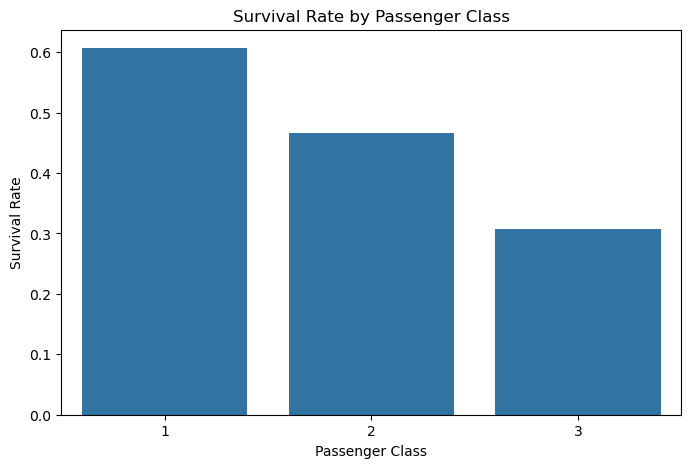

In [20]:
# Calculate survival rate by Pclass
survival_rate_by_class = work_data.groupby('Pclass')['Survived'].mean().reset_index()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_class)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

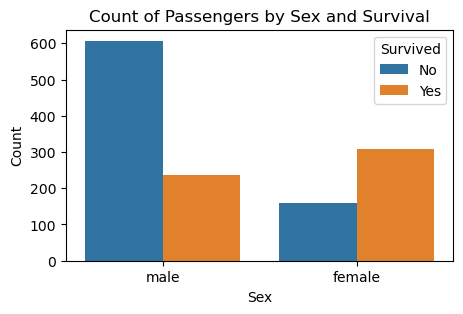

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex', hue='Survived', data=work_data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex and Survival')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

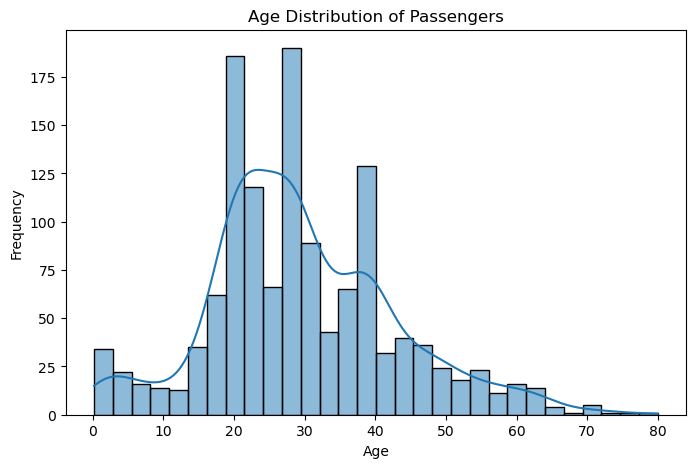

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(work_data['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.show()

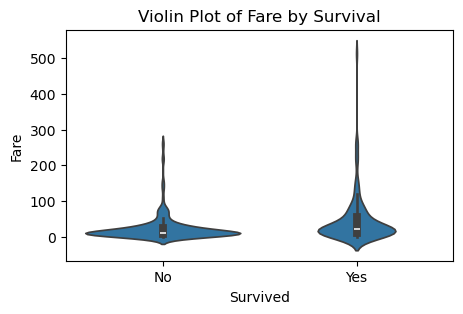

In [23]:
plt.figure(figsize=(5, 3))
sns.violinplot(x='Survived', y='Fare', data=work_data)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Violin Plot of Fare by Survival')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [24]:
# Create a new column 'Title' by applying the extract_title function
work_data['''Title'''] = work_data['Name'].apply(extract_title)
work_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [25]:
check = work_data.groupby('Title')['Survived'].sum().reset_index()
check

,Title,Survived
0,Capt,0.0
1,Col,3.0
2,Don,0.0
3,Dona,1.0
4,Dr,3.0
5,Jonkheer,0.0
6,Lady,1.0
7,Major,1.0
8,Master,39.0
9,Miss,164.0


In [29]:
# view_data = work_data
# encoder = OneHotEncoder()
# onehot_encoded = encoder.fit_transform(view_data[['Title']])
# encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names(['Title']))


In [31]:
work_data = pd.get_dummies(work_data, columns=['Sex', 'Embarked'], drop_first=True)
work_data.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,True,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,False,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,False,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,False,False,True
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,True,False,True
5,6,0.0,3,"Moran, Mr. James",21.0,0,0,330877,8.4583,Mr,True,True,False
6,7,0.0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,Mr,True,False,True
7,8,0.0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,Master,True,False,True
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,Mrs,False,False,True
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,Mrs,False,False,False


In [33]:

work_data = work_data.drop(columns = ['''Ticket''', 'Name'])
work_data = pd.get_dummies(work_data, columns=['''Title'''], drop_first=True)
work_data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the
0,1,0.0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,True,False,False,False,False,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,3,1.0,3,26.0,0,0,7.9250,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,0.0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,True,False,False,False,False,False
5,6,0.0,3,21.0,0,0,8.4583,True,True,False,...,False,False,False,False,True,False,False,False,False,False
6,7,0.0,1,54.0,0,0,51.8625,True,False,True,...,False,False,False,False,True,False,False,False,False,False
7,8,0.0,3,2.0,3,1,21.0750,True,False,True,...,True,False,False,False,False,False,False,False,False,False
8,9,1.0,3,27.0,0,2,11.1333,False,False,True,...,False,False,False,False,False,True,False,False,False,False
9,10,1.0,2,14.0,1,0,30.0708,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [35]:
work_data.corr().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the
PassengerId,1.000000,0.077594,-0.038354,0.024337,-0.055224,0.008942,0.031416,0.013406,0.011585,-0.049836,...,0.002254,-0.050389,0.002226,-0.020854,0.014116,0.034473,0.005901,-0.005940,-0.004024,0.007683
Survived,0.077594,1.000000,-0.255712,-0.061914,-0.002796,0.046469,0.196261,-0.368175,-0.005436,-0.121700,...,0.100750,0.218210,0.046461,0.032841,-0.392540,0.231051,0.006763,-0.046128,0.032841,0.032841
Pclass,-0.038354,-0.255712,1.000000,-0.353411,0.060832,0.018322,-0.558477,0.124617,0.230491,0.091320,...,0.095257,0.030478,-0.060480,-0.042750,0.121492,-0.178808,0.009581,-0.027610,-0.042750,-0.042750
Age,0.024337,-0.061914,-0.353411,1.000000,-0.185488,-0.118435,0.170237,0.065615,-0.030441,-0.042227,...,-0.352832,-0.252046,-0.016639,-0.011761,0.170456,0.186749,0.011339,0.068484,0.040281,0.006974
SibSp,-0.055224,-0.002796,0.060832,-0.185488,1.000000,0.373587,0.160224,-0.109609,-0.048678,0.073709,...,0.329171,0.079622,-0.018741,-0.013247,-0.243104,0.065098,-0.018741,-0.018741,0.013308,-0.013247


In [37]:
work_data.corr().Survived

PassengerId       0.077594
Survived          1.000000
Pclass           -0.255712
Age              -0.061914
SibSp            -0.002796
Parch             0.046469
Fare              0.196261
Sex_male         -0.368175
Embarked_Q       -0.005436
Embarked_S       -0.121700
Title_Col         0.037664
Title_Don        -0.023280
Title_Dona        0.032841
Title_Dr         -0.006338
Title_Jonkheer   -0.023280
Title_Lady        0.032841
Title_Major       0.006763
Title_Master      0.100750
Title_Miss        0.218210
Title_Mlle        0.046461
Title_Mme         0.032841
Title_Mr         -0.392540
Title_Mrs         0.231051
Title_Ms          0.006763
Title_Rev        -0.046128
Title_Sir         0.032841
Title_the         0.032841
Name: Survived, dtype: float64

In [39]:
work_data.dtypes

PassengerId         int64
Survived          float64
Pclass              int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Sex_male             bool
Embarked_Q           bool
Embarked_S           bool
Title_Col            bool
Title_Don            bool
Title_Dona           bool
Title_Dr             bool
Title_Jonkheer       bool
Title_Lady           bool
Title_Major          bool
Title_Master         bool
Title_Miss           bool
Title_Mlle           bool
Title_Mme            bool
Title_Mr             bool
Title_Mrs            bool
Title_Ms             bool
Title_Rev            bool
Title_Sir            bool
Title_the            bool
dtype: object

In [41]:
X = work_data
Y = X['Survived'].astype(int).to_numpy()
X = preprocessing.StandardScaler().fit_transform(X)
Y.shape


(1309,)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.2)
print('Training Data Set:',X_train.shape, '\nTraining Target Variable:',Y_train.shape)
print('Testing Data Set {}\nTesting Target variable{}'.format(X_test.shape, Y_test.shape))

Training Data Set: (1047, 27) 
Training Target Variable: (1047,)
Testing Data Set (262, 27)
Testing Target variable(262,)


In [45]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator = lr, param_grid = parameters, cv =10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [47]:
best_params = logreg_cv.best_params_
best_score = logreg_cv.best_score_
accuracy_score = logreg_cv.score(X_test, Y_test)

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)
print('The accuracy Score using the score method is {}'.format(accuracy_score))
print('Amazing, the model has an Accuracy of {}'.format(best_score * 100))

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score (Accuracy): 1.0
The accuracy Score using the score method is 1.0
Amazing, the model has an Accuracy of 100.0


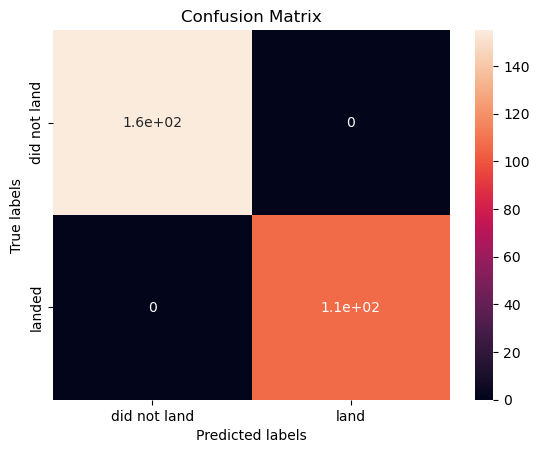

In [53]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [1]:
pwd


'C:\\Users\\ddr3'